# Маркови вериги

Оваа дигитална тетратка смета дека од предавања веќе знаете што е Маркова верига.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pydtmc as mc

## Матрица на премини - $P$
Маркова верига може да се претстави преку матрица на премини која математички ја означуваме со $p$, а во кодот со `P`. Даден е пример за една таква матрица преку користење $n$-димензионална матрица од библиотеката `numpy`.

In [2]:
n = 8
p = np.zeros((n, n))
p[0, 1], p[0, 2] = 1/2, 1/2
p[1, 0], p[1, 1] = 1/2, 1/2
p[2, 3], p[2, 7] = 1/2, 1/2
p[3, 2], p[3, 4] = 1/2, 1/2
p[4, 5] = 1
p[5, 6] = 1
p[6, 5], p[6, 7] = 1/2, 1/2
p[7, 5] = 1
p

array([[0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0.5],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ]])

Секој ред од оваа матрица ја означува веројатноста каде, односно во која состојба, може да премине процесот кој моментално се наоѓа во некоја дадена состојба. Според ова, збирот на секој ред мора да изнесува 1. За да се осигураме дека не сме направиле грешкка при рачното внесување броеви можеме самите да направиме проверка, или пак таа проверка да ни ја направи библиотеката `pydtmc` за маркови вериги.

## Дијаграм на Маркова верига

За исцртување на Маркова верига користете ја фукнцијата `plot_graph()` од библиотеката `pydtmc`.


DISCRETE-TIME MARKOV CHAIN
 SIZE:         8
 CLASSES:      4
  - RECURRENT: 1
  - TRANSIENT: 3
 ABSORBING:    NO
 APERIODIC:    YES
 IRREDUCIBLE:  NO
 ERGODIC:      NO



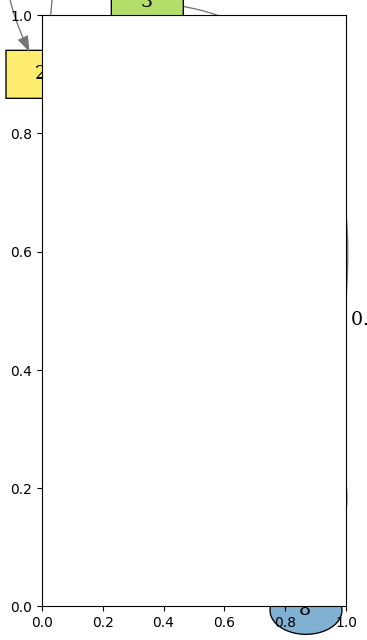

In [3]:
chain_1 = mc.MarkovChain(p)
print(chain_1)
mc.plot_graph(chain_1)

Ако имате проблеми со исцртување, како што е прикажано на сликата, користете ја функција `draw_markov_chain()` која е дадена подолу.


DISCRETE-TIME MARKOV CHAIN
 SIZE:         8
 CLASSES:      4
  - RECURRENT: 1
  - TRANSIENT: 3
 ABSORBING:    NO
 APERIODIC:    YES
 IRREDUCIBLE:  NO
 ERGODIC:      NO



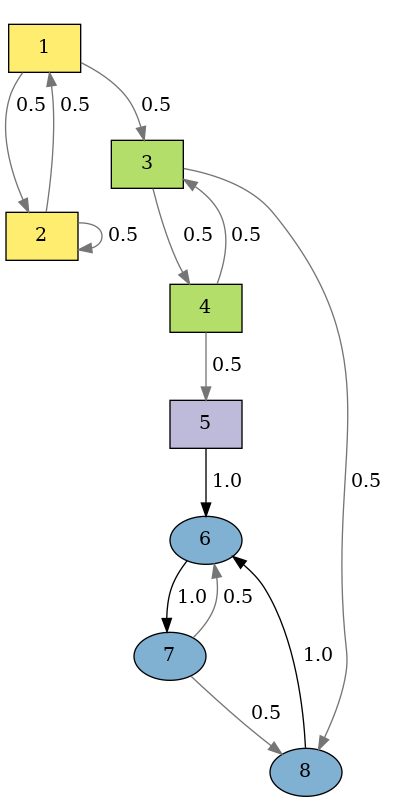

In [4]:
def draw_markov_chain(chain):
    plt.ioff()
    print(chain)
    fig, ax = mc.plot_graph(chain)
    ax.set_visible(False)
    plt.show()

chain_1 = mc.MarkovChain(p)
draw_markov_chain(chain_1)

Библиотеката `pydtmc` има многу функции за анализа на маркови вериги. Со `print(chain)` веќе гледаме статистика за нашата верига. Можеме и да го визуелизираме графот. Во продолжение од оваа тетратка ќе ги објасниме термините испечатени погоре и ќе ги работиме со библиотеката `pydtmc`. 

## Распределба на веројатност по состојби - $\pi$

За да знаеме со која веројатност се наоѓа процесот во некоја состојба, треба да ја знаеме распределбата на веројатност по состојби за дадениот временски момент. Таа распределба на веројатност по состојби ја означуваме со $\pi$. Марковата верига не ја моделира $\pi$. Марковата верига ја кажува веројатноста да преминеме од една во наредна состојба. Ако не ја знаме моменталната $\pi$, тогаш ја пресметуваме множејќи некоја претходна позната $\pi$ со матрицата на премини $P$ онолку пати колку временски моменти наназад е претходната позната $\pi$. Ако во ни еден случај не ни е позната некоја $\pi$, тогаш одбираме еден временски момент и го означуваме за почетен. Во тој почетен момент $\pi$ е рамномерна распределба. Тоа значи дека веројатноста процесот да се наоѓа во некоја состојба е еднаква за сите состојби. Секоја надворешна информација за почетната распределба на веројатност по состојби, ќе влијае $\pi$ да не е рамномерна распределба.

Почетната распределба на веројатност по состојби ја означуваме со $\pi_0$. Во наредниот временски момент имаме $$\pi^{(1)} = \pi^{(0)} P$$, а за $n$-тиот момент ќе важи $$\pi^{(n)} = \pi^{(n-1)}P = \pi^{(0)} P^n$$.

## Класификација на состојбите

### Достапна состојба

За состојбата $j$ велиме дека е достапна од состојбата $i$ ако е возможно да се стигне од $i$ до $j$ за конечно време $n$, така што ако $p_{ij}^{(n)} > 0$. Математички се запишува $i → j$. Се смета дека секоја состојба е достапна сама од себе, бидејќи $p_{ij}^{(0)} = 1$.

Библиотеката може да испечати матрица која покажува од која до која состојба може да се стигне со 1 чекор.

In [5]:
chain_1.accessibility_matrix

array([[1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1]])

### Комуницирачки состојби
Две состојби $i$ и $j$ кои се достапни една на друга се комуницирачки состојби. Математички се запишува $i ↔ j$.

Библиотеката може да одговори дали две состојби комуницираат.

In [6]:
chain_1.are_communicating('1', '3')

False

### Рекурентна состојба
Една состојба е рекурентна ако процесот некогаш се враќа во таа состојба откако ќе ја напушти. Во секоја Маркова верига има барем една рекурентна состојба.

Библиотеката може да одговори дали една состојба е рекурентна.

In [7]:
chain_1.is_recurrent_state('1')

False

Библиотеката може да ги испечати сите рекурентни состојби.

In [8]:
chain_1.recurrent_states

['6', '7', '8']

### Транзиентна состојба
Една состојба е транзиентна доколку не е рекурентна. Со други зборови, постои веројатност никогаш да не се вратиме во дадената состојба ако еднаш ја напуштиме.

Библиотеката може да одговори дали една состојба е транзиентна.

In [9]:
chain_1.is_transient_state('5')

True

Библиотеката може да ги испечати сите транзиентни состојби.

In [10]:
chain_1.transient_states

['1', '2', '3', '4', '5']

### Апсорбирачка состојба
Апсорбирачка состојба е онаа состојба од која процесот не може да излезе штом еднаш ќе влезе во таа состојба.

Библиотеката може да одговори дали една состојба е апсорбирачка.

In [11]:
chain_1.is_absorbing_state('5')

False

### Период на една состојба
Една состојба $i$ има период $k$ ако кое било враќање во оваа состојба се случува во $zk$ чекори каде $z \in \mathbb{Z}_{> 0}$. Ако $k=1$ тогаш состојбата е апериодична.

## Класи, и нивна класификација
Една Маркова верига може да биде поделена на класи, така што помеѓу себе комуницираат само членовите на една иста класа.

### Рекурентна класа
Една класа е рекурентна ако процесот некогаш се враќа во таа класа откако ќе ја напушти. Во секоја Маркова верига има барем една рекурентна класа.

Библиотеката може да ги испечати сите рекурентни класи.

In [12]:
chain_1.recurrent_classes

[['6', '7', '8']]

### Транзиентна класа
Една класа е транзиентна доколку не е рекурентна. Со други зборови, постои веројатност никогаш да не се вратиме во дадената класа ако еднаш ја напуштиме.

Библиотеката може да ги испечати сите транзиентни класи.

In [13]:
chain_1.transient_classes

[['1', '2'], ['3', '4'], ['5']]

## Својства на Марковите вериги

### Нескратливост
Една Маркова верига е нескратлива ако се состои само од една класа. Со други зборови, ако сите состојби комуницираат помеѓу себе. Ова својство е пожелно бидејќи анализата на нескратливи вериги е многу поедноставна отколку анализата на скратливите вериги.

Библиотеката може да одговори дали една Маркова верига е нескратлива.

In [14]:
chain_1.is_irreducible

False

### Апериодничност
*  Една Маркова верига е апериодична ако секоја нејзина состојба е апериодична.
*  Нескратливата Маркова верига доволно е да има само една апериодична состојба за да докажеме дека целата верига е апериодична.
*  Марковата верига е апериодична ако постои барем една состојба која транзитира во самата себе.
*  Една верига е апериодична ако од состојба $i$ може да се стигне до состојба $j$ за различни времиња $l$ и $m$, а притоа важи $\gcd(l, m) = 1$.
*  Една верига е апериодична ако постои позитивен цел број $n$ за кој сите членови на матрицата $P^n$ се поголеми од нула.

Библиотеката може да одговори дали една Маркова верига е апериодична.

In [15]:
chain_1.is_aperiodic

True

### Апсорпција

Една Маркова верига е апсорбирачка ако од секоја состојба може да се достигне до барем една апсорбирачка состојба.

In [16]:
p = np.array([[1, 0, 0, 0], [1/3, 0, 2/3, 0], [0, 1/2, 0, 1/2], [0, 0, 0, 1]])
p

array([[1.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.        , 0.66666667, 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.        , 1.        ]])


DISCRETE-TIME MARKOV CHAIN
 SIZE:         4
 CLASSES:      3
  - RECURRENT: 2
  - TRANSIENT: 1
 ABSORBING:    YES
 APERIODIC:    YES
 IRREDUCIBLE:  NO
 ERGODIC:      NO



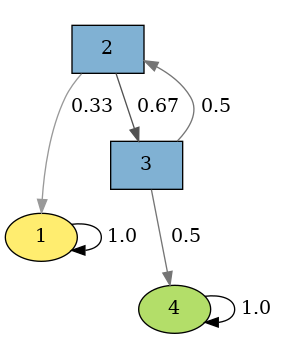

In [17]:
chain_2 = mc.MarkovChain(p)
# mc.plot_graph(chain_2)
draw_markov_chain(chain_2)

Библиотеката може да одговори дали една Маркова верига е апериодична.

In [18]:
chain_2.is_absorbing

True

Библиотеката може да ги наброи сите апсорбирачки состојби.

In [19]:
chain_2.absorbing_states

['1', '4']

Во понатамошниот дел од предметот, од интерес ќе ни биде да ја пресметаме веројатноста процесот да се апсорбира во некоја апсорбирачка состојба ако почнува од дадена состојба $i$. Во продолжение ќе покажеме како, за горе дадената Маркова верига, рачно да ја пресметаме веројатноста процесот да се апсорбира во состојбата 1. Нека со $a_i$ ја дефинираме веројатноста за апсорпција на процесот во состојбата 1. 
$$ a_i = \sum_k a_k p_{ik} $$
Оваа пресметка ја вршиме за секоја состојба како почетна и добиваме систем равенки со чие решавање се добиваат бараните вредности. За дадениот случај ќе важи $a_1 = 1$ бидејќи состојбата 1 е онаа состојба за која бараме веројатност процесот да се апсорбира во неа. За останатите апсорбирачки состојби, како состојбата 4 во овој случај, поставуваме $a_4 = 0$.
$$ a_1 = 1 $$
$$ a_2 = \frac{1}{3} a_1 + \frac{2}{3} a_3 $$
$$ a_3 = \frac{1}{2} a_2 + \frac{1}{2} a_4 $$
$$ a_4 = 0 $$
За решенија на системот ги добиваме вредностите $a_1 = \frac{1}{2}$ и $a_2 = \frac{1}{4}$. Истото ова можеме да го пресметаме и преку библиотеката.

Библиотеката може да ги пресмета веројатностите за апсорпција во некоја состојба тргајќи од дадена состојба.

In [20]:
chain_2.absorption_probabilities

array([[0.5 , 0.25],
       [0.5 , 0.75]])

Се забележува дека првиот ред од горната матрица одговара на вредностите кои рачно ги најдовме. Вториот ред ги кажува веројатностите процесот да се апсорбира во состојбата 4.

### Средно време на достигнување

Подеднакво важен фактор во проучувањето на Марковите вериги е и времето на достигнување, односно бројот на чекори потребни да се стигне до бараната состојба, за прв пат. Оваа вредност се пресметува на сличен начин како претходно, со тоа што на резултатот се додава и бројот 1, што го претставува првиот чекор кој е неопходен да се напушти тековната состојба.
$$ t_i = 1 + \sum_k t_k p_{ik} $$

In [21]:
p_3 = np.array([[1/4, 1/2, 1/4], [1/3, 0, 2/3], [1/2, 0, 1/2]])
p_3

array([[0.25      , 0.5       , 0.25      ],
       [0.33333333, 0.        , 0.66666667],
       [0.5       , 0.        , 0.5       ]])


DISCRETE-TIME MARKOV CHAIN
 SIZE:         3
 CLASSES:      1
  - RECURRENT: 1
  - TRANSIENT: 0
 ABSORBING:    NO
 APERIODIC:    YES
 IRREDUCIBLE:  YES
 ERGODIC:      YES



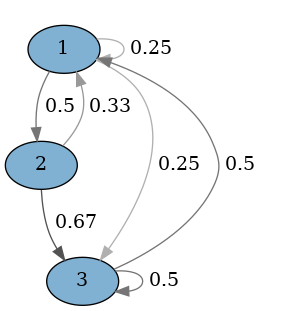

In [22]:
chain_3 = mc.MarkovChain(p_3)
draw_markov_chain(chain_3)

За дадениот случај, го дефинираме $t_i$ како времето потребно процесот да западне во состојба 1, за прв пат, ако почне од состојба $i$. Очигледно е дека според оваа дефиниција $t_1 = 0$.
$$ t_1 = 0 $$
$$ t_2 = 1 + \frac{2}{3} t_3 $$
$$ t_3 = 1 + \frac{1}{2} t_3$$
Со решавање на овој систем се добива дека $t_2 = \frac{7}{3}$ и $t_3 = 2$.

Библиотеката може да го пресмета времето на достигање до дадена состојба.

In [23]:
chain_3.mean_first_passage_times_to('1')

array([0.        , 2.33333333, 2.        ])

Ако веригата ни е апсорбирачка, наместо `mean_first_passage_times_to()` ќе ја употребиме `absorption_times` за да го пресметаме времето на достигнување до апсорбирачките состојби.

In [24]:
chain_3.absorption_times

### Средно време на враќање

Ова е очекуваното време процесот да напушти една состојба и пак да се врати во неа. Се пресметува на многу сличен начин со средното време на достигнување и се означува со $r_i$. Со $t$ е означено средното време на достигање.
$$ r_i = 1 + \sum_k t_k p_{ik} $$
По дефиниција, оваа вредност е 1 за апсорбирачки состојби, а е поголема од 1 за сите останати. За дадениот случај $$r_1 = 1 + \frac{1}{2} t_1 + \frac{1}{2} t_2 = \frac{8}{3} $$ 

### Стационарни распределби на веројатностите

За крај, останува да се испита долготрајното однесување на Марковите вериги, односно да се види што се случува кога бројот на чекори $n$ тежнее кон бесконечност. Со други зборови, од интерес е распределбата на веројатностите по состојби $\pi^{(n)}$. Ако веригата е нескратлива и апериодична, имаме единствена стационарна распределба. 
Во стационарен режим распределбата на веројатностите не зависи од почетната состојба. Со други зборови, во стационарен режим распределбата на веројатностите на состојбите не се менува. Значи, стационарните распределби можат да се најдат со решавање на системот на равенки $$\pi = \pi P$$. Притоа ќе важи $$\sum_j \pi_j = 1$$.

Во случај на периодични Маркови вериги, процесот не конвергира во конкретна распределба.

Библиотеката може да ја пресмета стационарната респределба на веројатности по состојби.

In [25]:
chain_3.pi

[array([0.375 , 0.1875, 0.4375])]

Трет начин да ја пресметаме стационарната распределба е ако доволно пати ја измножеме матрицата $P$.

In [26]:
np.linalg.matrix_power(p_3, 1000)

array([[0.375 , 0.1875, 0.4375],
       [0.375 , 0.1875, 0.4375],
       [0.375 , 0.1875, 0.4375]])

In [27]:
pi_0 = [1, 0, 0]
pi = pi_0 @ np.linalg.matrix_power(p_3, 1000)
pi

array([0.375 , 0.1875, 0.4375])